In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [6]:
!pip install minisom
from minisom import MiniSom

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11719 sha256=9f2686f27ad8e763c1b0c02039b82f1177f447f4e8cedd76583d4c3d378ac860
  Stored in directory: c:\users\delga\appdata\local\pip\cache\wheels\ec\7e\00\ac334ebb21e9016a73bef195e9732606217c6894f96bd51e6f
Successfully built minisom


In [17]:
# Cargar el dataset Wine
archivo_csv = 'wine.csv'
data = pd.read_csv(archivo_csv, delimiter=',')


In [19]:
# Mostrar las primeras filas del dataset
print(data.head())

   1  14.23  1.71  2.43  15.6  127   2.8  3.06   .28  2.29  5.64  1.04  3.92  \
0  1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
1  1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
2  1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
3  1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   
4  1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97  6.75  1.05  2.85   

   1065  
0  1050  
1  1185  
2  1480  
3   735  
4  1450  


In [27]:

# Asumimos que la primera columna es la clase, y las demás son las características
X = data.iloc[:, 1:].values  # Características (todas las columnas excepto la primera)
y = data.iloc[:, 0].values   # Clase (primera columna)

In [29]:
# Normalizamos los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
# Inicializamos el SOM (15x15 cuadrícula, con 13 características de entrada)
som = MiniSom(x=15, y=15, input_len=X.shape[1], sigma=1.0, learning_rate=0.5)


In [33]:
# Entrenamos el SOM
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 1000)  # Entrenamiento con 1000 iteraciones

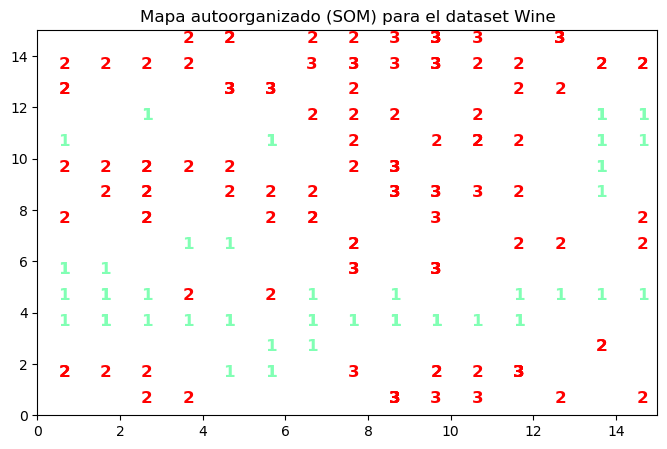

In [41]:
# Visualización de los resultados
plt.figure(figsize=(8, 5))
for i, x in enumerate(X_scaled):
    w = som.winner(x)  # Encontrar la neurona ganadora
    plt.text(w[0] + 0.5, w[1] + 0.5, str(y[i]), color=plt.cm.rainbow(y[i] / 2), 
             fontdict={'size': 12, 'weight': 'bold'})

plt.xlim([0, 15])
plt.ylim([0, 15])
plt.title("Mapa autoorganizado (SOM) para el dataset Wine")
plt.show()